# Image Processing

## Import

In [1]:
!pip install ipywidgets
!pip install ipympl

You should consider upgrading via the '/Users/guehojang/.pyenv/versions/3.8.12/envs/memobrain/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/Users/guehojang/.pyenv/versions/3.8.12/envs/memobrain/bin/python -m pip install --upgrade pip' command.


In [25]:
!pip install scikit-image


     |████████████████████████████████| 13.1 MB 10.3 MB/s eta 0:00:01     |█████████████████████████████▍  | 12.1 MB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 18.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 16.5 MB/s eta 0:00:01
  Using cached PyWavelets-1.2.0-cp38-cp38-macosx_10_13_x86_64.whl (4.3 MB)
     |████████████████████████████████| 180 kB 15.1 MB/s eta 0:00:01
You should consider upgrading via the '/Users/guehojang/.pyenv/versions/3.8.12/envs/memobrain/bin/python -m pip install --upgrade pip' command.


In [71]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import seaborn as sns
#requirements
import nibabel as nib
import glob
from pathlib import Path
from sklearn.cluster import KMeans
%matplotlib widget
import ipywidgets as widgets
import pickle
from skimage import data, filters, io
#pip install "napari[all]"
import napari

## Retrieving all file paths 

In [3]:
def get_file_paths(file_ext = 'img', ipath = '../raw_data/OASIS2'):
    '''retrieve all file paths(*.img)'''
    full_path = []
    for p in Path(ipath).rglob("*."+file_ext):
        full_path.append(str(p))
        
    return full_path

## get images in dataframe

In [4]:
def get_img_df(file_ext = 'img', 
               ipath = '../raw_data/OASIS2', 
               datatype = 'mean', no_rows = -1):
    '''
    Get image dataframe.
    'Subject ID', 'session', 'file_names', 'full_path', 'image_files'
    datatype = 'mean' returns mean of 128 images of each mri image format.
    datatype = '3d' returns all 128 images of each mri image format.
    '''
    full_path = get_file_paths(file_ext, ipath)
    
    if no_rows == -1:
        number = len(full_path)
    else:
        number = no_rows
        
    file_lists = []
    for i in full_path[:number]:
        #[i[28:37], i[38:41], i[46:], i, mri_file])
        if datatype == 'mean':
            mri_file = np.mean(nib.load(i).get_fdata(), axis = 2)
        elif datatype == '3d':
            mri_file = nib.load(i).get_fdata()
        
        file_lists.append([i[28:37], i[38:41], i[46:], i, mri_file])

    file_df = pd.DataFrame(file_lists, columns = ['Subject ID', 'session', 'file_names', 'full_path', 'image_files'])
    return file_df

In [5]:
filedir = '../raw_data/OASIS2'



In [6]:
samples_3d = get_img_df('img', filedir, datatype = '3d', no_rows = 10)

In [15]:
def plot_mri_image(dataframe, subject_id = 'OAS2_0001', loc = 64):
    '''
    Plot mri images. 
    '''
    subject_df = dataframe[dataframe['Subject ID'] == subject_id]
    
    for i in range(len(subject_df)):
        img = subject_df['image_files'].iloc[i]
        if len(img.shape) == 3:
            plt.imshow(np.rot90(img))
            plt.title(f'''Subject ID : {subject_df['Subject ID'].iloc[i]}, 
                      Session : {subject_df['session'].iloc[i]}, 
                      File : {subject_df['file_names'].iloc[i]}''')
            plt.show()
        elif len(img.shape) == 4:
            plt.imshow(np.rot90(img[:,:,loc]))
            plt.title(f'''Subject ID : {subject_df['Subject ID'].iloc[i]}, 
                      Session : {subject_df['session'].iloc[i]}, 
                      File : {subject_df['file_names'].iloc[i]}''')
            plt.show()
    

In [16]:
slider = widgets.IntSlider(value = 64, min = 0, max = 127, step = 1)

/Users/guehojang/.pyenv/versions/3.8.12/envs/memobrain/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


TypeError: Invalid shape (256, 256, 128, 1) for image data

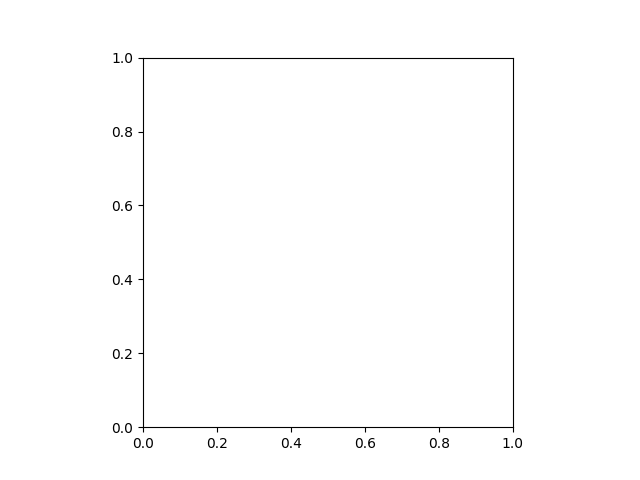

In [41]:
io.imshow(samples_3d.image_files[0])

In [34]:
sample_3d_0 = io.imread(np.array(samples_3d.image_files[0])) # make sure your working directory is right
print(sample_3d_0.shape)
(51, 5, 2, 196, 171)

OSError: Cannot understand given URI: array([[[[0.],
         [0.],
         [0.],
         .......

In [32]:
blobs_raw = np.stack([
    skimage(samples_3d.image_files[0]).binary_blobs(length=128, n_dim=3, volume_fraction=f)
    for f in np.linspace(0, 128, 128)
])

blobs = filters.gaussian(blobs_raw, sigma=(0, 2, 2, 2))
print(blobs.shape)
(10, 256, 256, 256)

NameError: name 'skimage' is not defined

In [ ]:
# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = plt.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = plt.axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

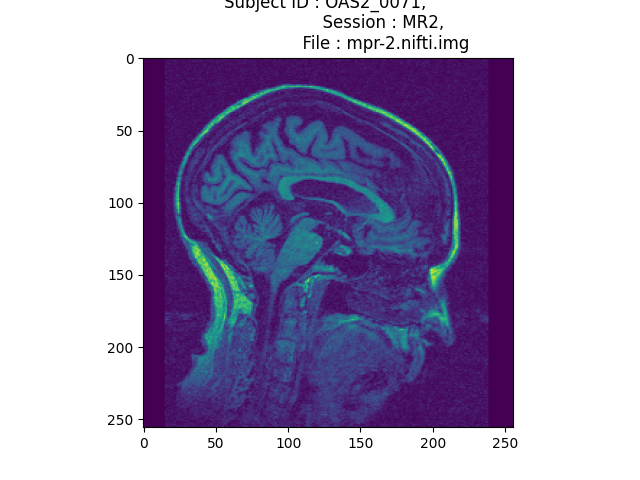

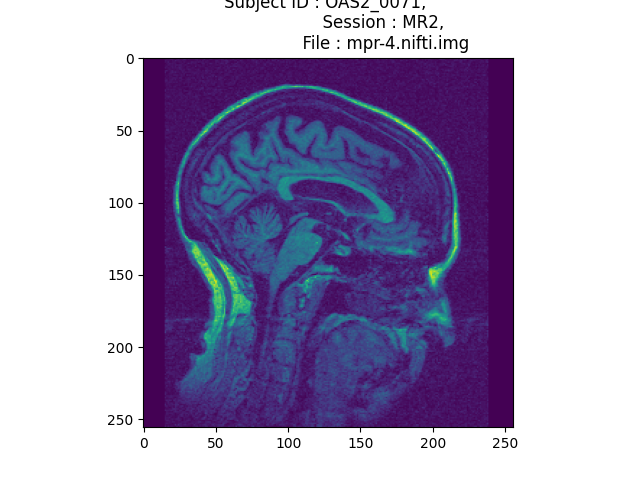

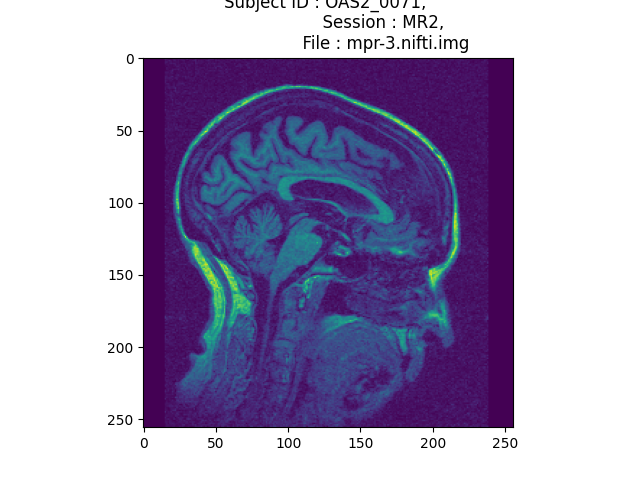

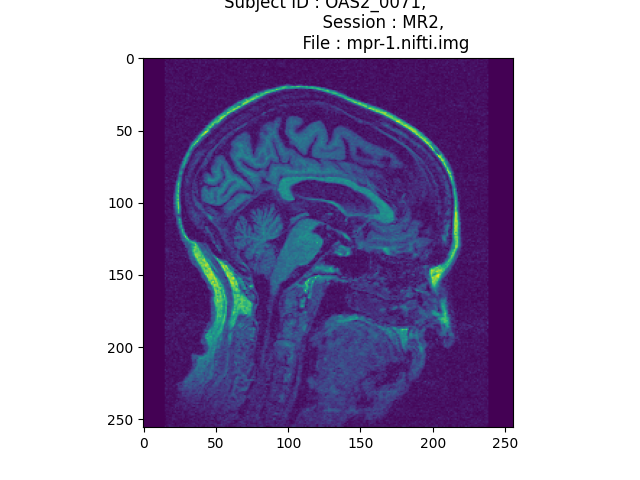

TypeError: from_bounds() missing 4 required positional arguments: 'x0', 'y0', 'width', and 'height'

In [22]:

fig, ax = plt.subplots()
plot_mri_image(dataframe = samples_3d, subject_id = 'OAS2_0071')
plt.subplots_adjust(bottom=0.25)

axfreq = plt.axes(np.arange(128, 1))
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

In [9]:
plt.imshow(np.rot90(samples_3d.image_files[0][:,:,64]))

In [10]:
samples_3d['Subject ID']

0    OAS2_0071
1    OAS2_0071
2    OAS2_0071
3    OAS2_0071
4    OAS2_0146
5    OAS2_0146
6    OAS2_0146
7    OAS2_0146
8    OAS2_0152
9    OAS2_0152
Name: Subject ID, dtype: object

In [11]:
samples_3d.image_files.iloc[0][50,50,:]

array([[ 121.],
       [ 243.],
       [ 238.],
       [ 236.],
       [ 101.],
       [ 204.],
       [ 176.],
       [ 273.],
       [ 213.],
       [  91.],
       [  19.],
       [  94.],
       [  95.],
       [  61.],
       [  92.],
       [  43.],
       [ 155.],
       [ 177.],
       [ 190.],
       [ 109.],
       [ 223.],
       [  52.],
       [  90.],
       [  69.],
       [  59.],
       [  78.],
       [ 125.],
       [ 117.],
       [ 205.],
       [ 156.],
       [  58.],
       [ 213.],
       [ 266.],
       [ 144.],
       [ 279.],
       [ 246.],
       [ 148.],
       [ 308.],
       [ 143.],
       [ 362.],
       [ 350.],
       [ 127.],
       [ 481.],
       [ 630.],
       [ 883.],
       [ 690.],
       [ 982.],
       [1263.],
       [1741.],
       [1339.],
       [1638.],
       [1393.],
       [1072.],
       [1569.],
       [1777.],
       [1522.],
       [1197.],
       [1406.],
       [1139.],
       [1465.],
       [1638.],
       [1257.],
       [

In [12]:
np.rot90(samples_3d.image_files.iloc[0]).shape

(256, 256, 128, 1)

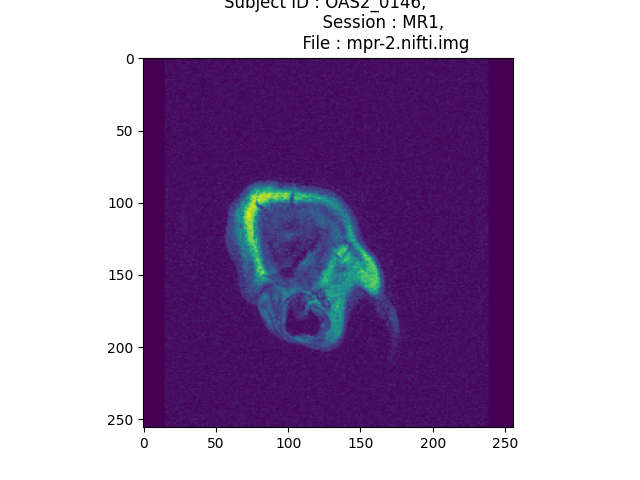

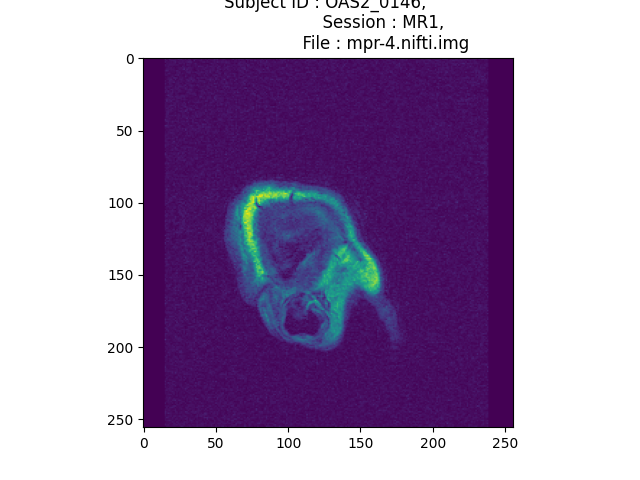

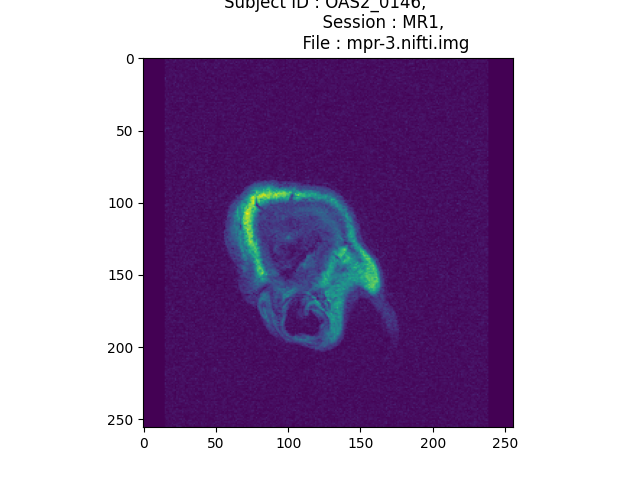

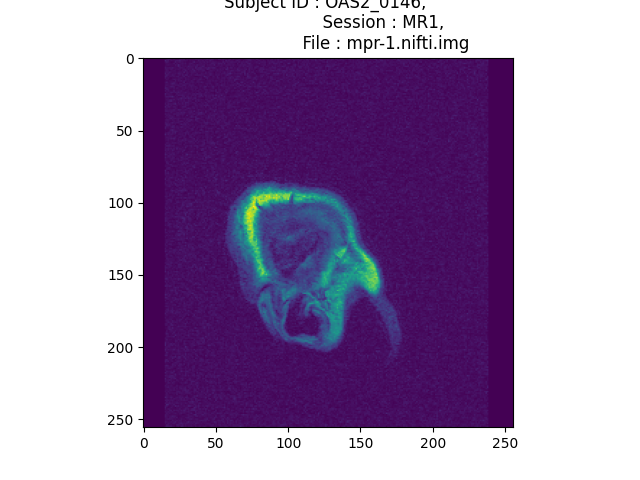

In [13]:
plot_mri_image(samples_3d, subject_id = 'OAS2_0146', loc = 5)

In [14]:
img1 = samples_3d.iloc[0]['image_files']


In [15]:
img1.shape

(256, 256, 128, 1)

In [16]:
img1[:,:,0].max()

4095.0

In [17]:
img_res = img1.reshape(256 * 256 * 128, 1)

In [18]:
color_count = len(pd.DataFrame(img_res).value_counts())

In [19]:
color_count

3969

In [20]:

km50 = KMeans(n_clusters=50)
km256 = KMeans(n_clusters = 256)


In [21]:
sample_img = samples_3d.image_files[0][:,:,64].reshape(256*256, 1)

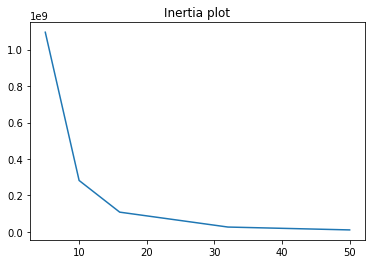

In [22]:
%matplotlib inline
inertias = []
k = [5, 10, 16, 32, 50]

for K in k:
    km_test = KMeans(n_clusters = K).fit(sample_img)
    inertias.append(km_test.inertia_)

plt.plot(k, inertias)
plt.title('Inertia plot')
plt.show()

In [54]:
sample_imgs = []

for file in samples_3d.image_files:
    image = []
    for i in range(128):
        image.append(file[:,:,i].reshape(256*256, 1))
    sample_imgs.append(image)
    
sample_imgs = np.array(sample_imgs)

In [55]:
sample_imgs.shape

(10, 128, 65536, 1)

In [25]:
sample_imgs.reshape(10*128*65536, 1)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [43]:
# km16 = KMeans(n_clusters=16).fit(sample_imgs.reshape(10*128*65536, 1))

# pickle.dump(km16, open("km16.pkl", "wb"))
import pickle
km16 = pickle.load(open("km16.pkl", "rb"))

In [44]:
km16.cluster_centers_

array([[   6.07696285],
       [1794.8224309 ],
       [ 790.5219738 ],
       [3233.56745069],
       [ 180.44098477],
       [1149.79645337],
       [ 441.20484821],
       [1353.98083934],
       [2451.57617282],
       [ 280.04347159],
       [ 103.78002425],
       [1568.88175321],
       [ 616.99291821],
       [ 965.39889226],
       [2110.38921645],
       [2811.47719707]])

In [45]:
km16_compressed = np.array(km16.cluster_centers_[km16.labels_])

In [61]:
sample_imgs_comp = km16_compressed.reshape(10, 128, 256, 256, 1).astype('uint16')

In [57]:
sample_imgs_comp[:,:,:,:,0].shape

(256, 256, 128, 10)

In [76]:
viewer = napari.view_image(np.rot90(sample_imgs_comp[:,:,:,:,0]), name='MRI_3D')

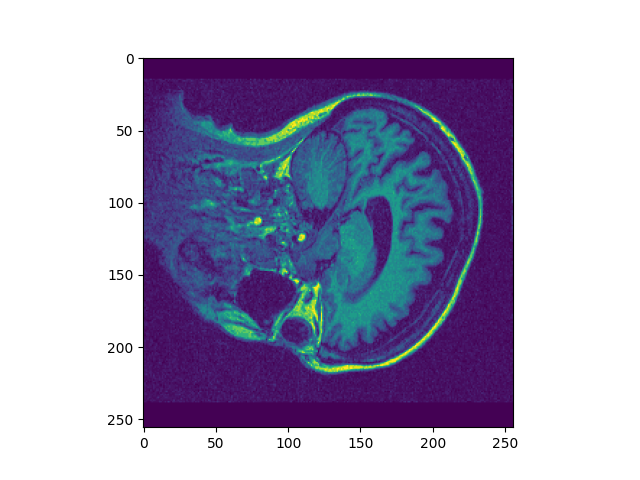

In [66]:
plt.imshow(sample_imgs_comp[0,50,:,:,0])
plt.show()

/Users/guehojang/.pyenv/versions/3.8.12/envs/memobrain/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ax.get_figure().tight_layout()


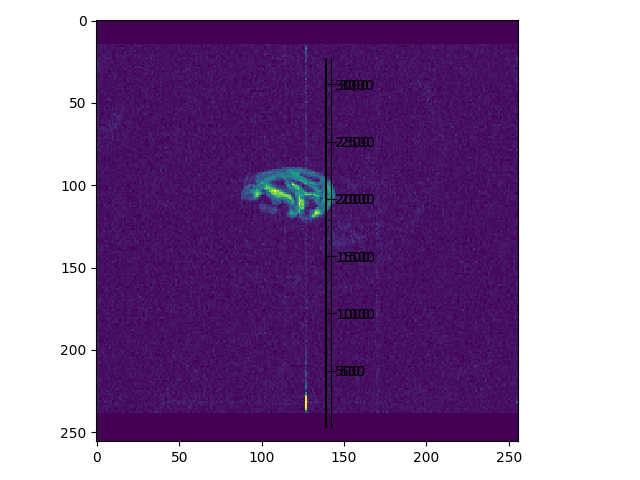

In [69]:
io.imshow(sample_imgs_comp[0,0,:,:,0])
plt.show()

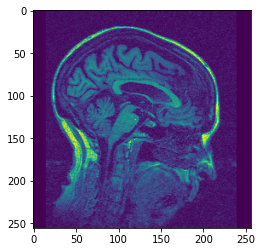

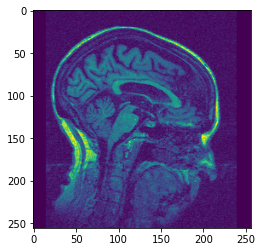

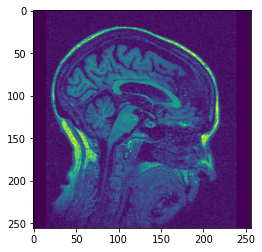

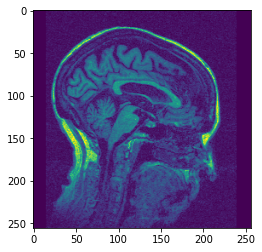

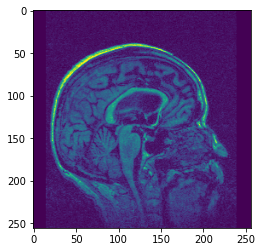

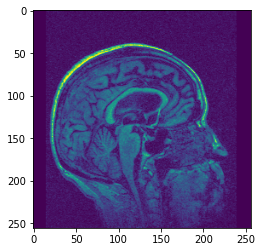

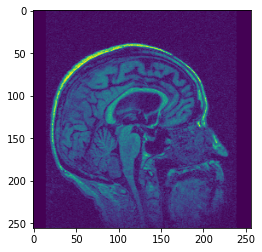

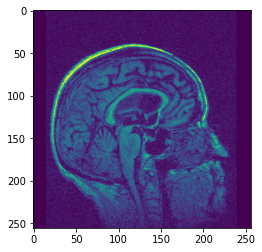

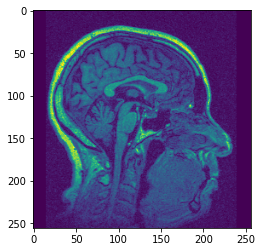

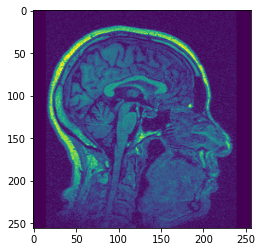

In [33]:
for i in sample_imgs_comp:
    plt.imshow(np.rot90(i[64, :, :]))
    plt.show()

In [34]:
sample0 = samples_3d.image_files[0]

In [35]:
sample0.shape

(256, 256, 128, 1)

In [36]:
sample0_mean = np.mean(sample0, axis = 2).reshape(256*256, 1)

In [37]:
km16.labels_.shape

(83886080,)

In [38]:
km_sample0 = KMeans(n_clusters = 16).fit(sample0_mean)
km_sample0_compressed = np.array(km_sample0.cluster_centers_[km_sample0.labels_]).astype('uint16').reshape(256, 256, 1)

In [51]:
km16_sample0_compressed = np.array(km16.cluster_centers_[km_sample0])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [53]:
sample0_mean.shape

(65536, 1)

In [52]:
km16_sample0_compressed = km16.transform(sample0_mean).astype('uint16').reshape(256, 256, 1)

ValueError: cannot reshape array of size 1048576 into shape (256,256,1)

In [49]:
km_sample0_compressed.shape

(256, 256, 1)

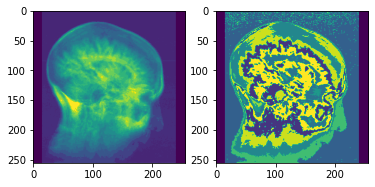

In [50]:
plt.subplot(1, 2, 1)
plt.imshow(np.rot90(km_sample0_compressed))
plt.subplot(1, 2, 2)
plt.imshow(np.rot90(km16_sample0_compressed))

plt.show()

In [ ]:
def compress_img(dataframe, no_compress = 50, no_rows = -1):
    compressed_images = []
    if no_rows == -1:
        number = len(full_path)
    else:
        number = no_rows
    
    new_df = dataframe.iloc[:number]
    
    km50 = KMeans(n_clusters=50)
        
    for i in range(number):
        
        img = dataframe.image_files.iloc[i]
        
        if len(img.shape) == 4:
            img_res = img.reshape(256 * 256 * 128, 1)
        elif len(img.shape) == 3:
            img_res = img.reshape(256*256, 1)
        
        compressed_50 = km50.fit(img_res)
        km50_compressed = np.array(km50.cluster_centers_[km50.labels_])
        img_comp = km50_compressed.reshape(img.shape)

#Kmeans train for every single image?
    
    